In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import goes_ortho
import goes_timeseries
import glob
import numpy as np
import pandas as pd
import fnmatch

---

**Make LST timeseries**

In [2]:
directory = '/storage/GOES/goes17/2020/2/'
product = 'LSTC'
data_vars = ['LST']

In [4]:
# List of coordinates and elevations for the approx. center of 6 pixels across the top of Grand Mesa
# moving from the western most pixel [index p=0] to the easternmost pixel [index p=4] (p=5 is northwest pixel)
goes16_lons = [-108.192316, -108.15561, -108.12327, -108.09054, -108.05845, -108.206422391666663]
goes16_lats = [39.019474,   39.01835,   39.01723,   39.01547,   39.01339,   39.050010064820277]
goes16_zs =   [3047,        3100,       3140,       3150,       3250,       3058]       # elevation in meters

goes16_save_to_filepath = [  'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv',
                             'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv',
                             'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv',
                             'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv',
                             'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv',
                            'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv',]

for p in range(len(goes16_save_to_filepath)):
    # select one of these pixels to sample from
    df = goes_timeseries.make_abi_timeseries(directory, product, data_vars, goes16_lons[p], goes16_lats[p], goes16_zs[p], outfilepath=goes16_save_to_filepath[p])

Creating a timeseries of ['LST'] from LSTC at (39.019474, -108.192316, 3047)
Reading:
Saving csv file to: pixelA_GOES-16_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.01835, -108.15561, 3100)
Reading:
Saving csv file to: pixelB_GOES-16_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.01723, -108.12327, 3140)
Reading:
Saving csv file to: pixelE_GOES-16_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.01547, -108.09054, 3150)
Reading:
Saving csv file to: pixelD_GOES-16_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.01339, -108.05845, 3250)
Reading:
Saving csv file to: pixelE_GOES-16_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c2

In [5]:
# List of coordinates and elevations for the approx. center of 7 pixels across the top of Grand Mesa
goes17_lons = [-108.214361130365859, -108.198428798936561, -108.169536410267298, -108.140358474964145, -108.123280728026884, -108.093854057372326, -108.065331183766531]
goes17_lats = [39.057698098247343, 39.032094833665369, 39.032597793452695, 39.033612004500554, 39.008571173118511, 39.0100180755609, 39.011104964566741]
goes17_zs =   [3048,        3052,       3107,       3137,       3140,       3150,   3250]       # elevation in meters

goes17_save_to_filepath = [ 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv',
                      'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv',
                      'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv',
                     'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv',
                     'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv',
                      'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv',
                      'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv']

for p in range(len(goes17_save_to_filepath)):
    # select one of these pixels to sample from
    df = goes_timeseries.make_abi_timeseries(directory, product, data_vars, goes17_lons[p], goes17_lats[p], goes17_zs[p], outfilepath=goes17_save_to_filepath[p])

Creating a timeseries of ['LST'] from LSTC at (39.05769809824734, -108.21436113036586, 3048)
Reading:
Saving csv file to: pixelNW_GOES-17_ABI_2020_02_01-15_LST.csvM6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.03209483366537, -108.19842879893656, 3052)
Reading:
Saving csv file to: pixelA_GOES-17_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.032597793452695, -108.1695364102673, 3107)
Reading:
Saving csv file to: pixelB_GOES-17_ABI_2020_02_01-15_LST.csv-M6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.033612004500554, -108.14035847496415, 3137)
Reading:
Saving csv file to: pixelC1_GOES-17_ABI_2020_02_01-15_LST.csvM6_G17_s20200462301176_e20200462303549_c20200462304275.nc
Creating a timeseries of ['LST'] from LSTC at (39.00857117311851, -108.12328072802688, 3140)
Reading:
Saving csv fi

-----

**Make Rad timeseries**

Create a timeseries for a given point on the ground (latitude, longitude, elevation; elevation is needed for terrain parallax correction). The ABI Fixed Grid coordinates for the pointare first found in one of the "2 km" spatial resolution GOES ABI-L1b-RadC images. Then the pixel center coordinates for the "1 km" and "500 m" spatial resolution images are computed for the pixels that are nested within the "2 km" pixel. 

From each ABI-L1b-RadC image (netcdf file) found in the specified directory, the 1, 4, or 16 pixels are found for this location ("2 km", "1 km", and "500 m" pixels respectively). Reflectance (bands 1-6) or brightness temperature (bands 7-16) are computed from the radiances, and all are saved to an xarray dataset before exporting as a NetCDF file.

In [ ]:
directory = '/storage/GOES/goes17/2020/2/'
product = 'RadC'
data_vars = ['Rad']
# List of coordinates and elevations for the approx. center of 5 pixels across the top of Grand Mesa
# moving from the western most pixel [index p=0] to the easternmost pixel [index p=4]
goes16_lons = [-108.192316, -108.15561, -108.12327, -108.09054, -108.05845, -108.206422391666663]
goes16_lats = [39.019474,   39.01835,   39.01723,   39.01547,   39.01339,   39.050010064820277]
goes16_zs =   [3047,        3100,       3140,       3150,       3250,       3058]       # elevation in meters

goes17_lons = [-108.214361130365859, -108.198428798936561, -108.169536410267298, -108.140358474964145, -108.123280728026884, -108.093854057372326, -108.065331183766531]
goes17_lats = [39.057698098247343, 39.032094833665369, 39.032597793452695, 39.033612004500554, 39.008571173118511, 39.0100180755609, 39.011104964566741]
goes17_zs =   [3048,        3052,       3107,       3137,       3140,       3150,   3250]       # elevation in meters

save_to_filepath = [ 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv',
                      'pixelA_GOES-17_ABI_2020_02_01-15_R.csv',
                      'pixelB_GOES-17_ABI_2020_02_01-15_R.csv',
                     'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv',
                     'pixelC2_GOES-17_ABI_2020_02_01-15_R.csv',
                      'pixelD_GOES-17_ABI_2020_02_01-15_R.csv',
                      'pixelE_GOES-17_ABI_2020_02_01-15_R.csv']

for p in range(len(save_to_filepath)):
    # select one of these pixels to sample from
    df = goes_timeseries.make_nested_abi_timeseries(directory, product, data_vars, goes17_lons[p], goes17_lats[p], goes17_zs[p], outfilepath=save_to_filepath[p])

Found 44875 files in /storage/GOES/goes17/2020/2//**/*RadC*.nc
Creating a timeseries of ['Rad'] from RadC at (39.05769809824734, -108.21436113036586, 3048)

Reading 44875 files from /storage/GOES/goes17/2020/2//**/*RadC*.nc

'Dataset' object has no attribute 'goes_imager_projection'dC/00/C07/OR_ABI-L1b-RadC-M6C07_G17_s20200320056177_e20200320058561_c20200320059044_orthorectified.nc


/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


Saving csv file to: pixelNW_GOES-17_ABI_2020_02_01-15_R.csv-RadC/23/C02/OR_ABI-L1b-RadC-M6C02_G17_s20200462356176_e20200462358549_c20200462358581.nc
Found 44875 files in /storage/GOES/goes17/2020/2//**/*RadC*.nc
Creating a timeseries of ['Rad'] from RadC at (39.03209483366537, -108.19842879893656, 3052)

Reading 44875 files from /storage/GOES/goes17/2020/2//**/*RadC*.nc

'Dataset' object has no attribute 'goes_imager_projection'dC/00/C07/OR_ABI-L1b-RadC-M6C07_G17_s20200320056177_e20200320058561_c20200320059044_orthorectified.nc
Saving csv file to: pixelA_GOES-17_ABI_2020_02_01-15_R.csvb-RadC/23/C02/OR_ABI-L1b-RadC-M6C02_G17_s20200462356176_e20200462358549_c20200462358581.nc
Found 44875 files in /storage/GOES/goes17/2020/2//**/*RadC*.nc
Creating a timeseries of ['Rad'] from RadC at (39.032597793452695, -108.1695364102673, 3107)

Reading 44875 files from /storage/GOES/goes17/2020/2//**/*RadC*.nc

'Dataset' object has no attribute 'goes_imager_projection'dC/00/C07/OR_ABI-L1b-RadC-M6C07_G1

---

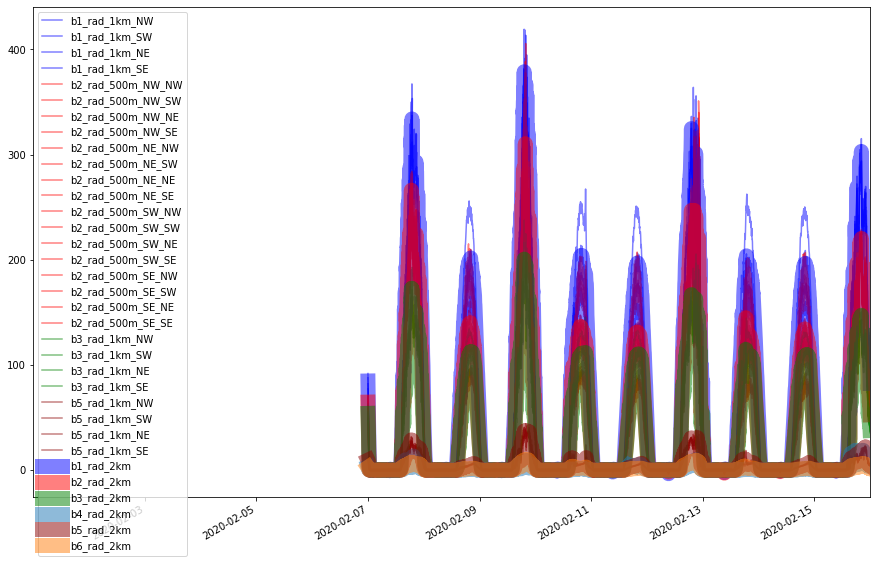

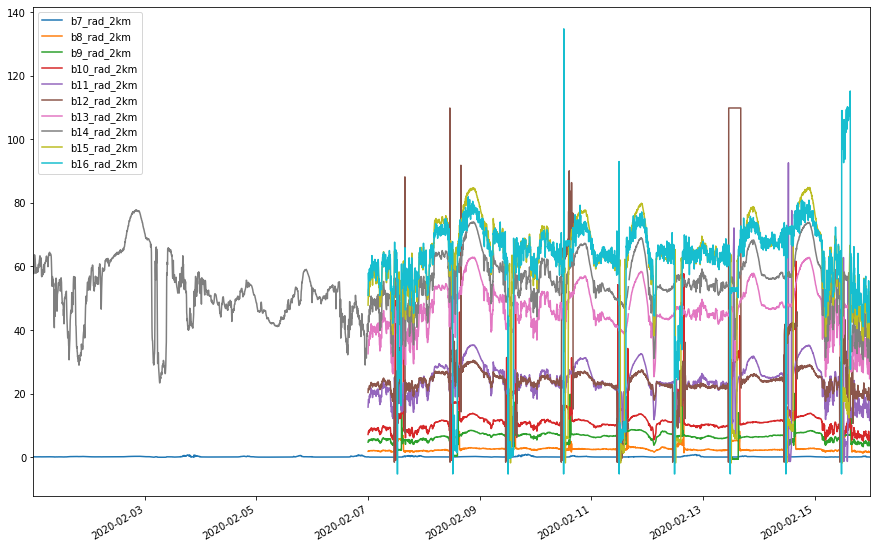

In [3]:
plt.figure(figsize=(15,10))

df.b1_rad_1km_NW.plot(c='b', alpha=0.5)
df.b1_rad_1km_SW.plot(c='b', alpha=0.5)
df.b1_rad_1km_NE.plot(c='b', alpha=0.5)
df.b1_rad_1km_SE.plot(c='b', alpha=0.5)

df.b2_rad_500m_NW_NW.plot(c='r', alpha=0.5)
df.b2_rad_500m_NW_SW.plot(c='r', alpha=0.5)
df.b2_rad_500m_NW_NE.plot(c='r', alpha=0.5)
df.b2_rad_500m_NW_SE.plot(c='r', alpha=0.5)
df.b2_rad_500m_NE_NW.plot(c='r', alpha=0.5)
df.b2_rad_500m_NE_SW.plot(c='r', alpha=0.5)
df.b2_rad_500m_NE_NE.plot(c='r', alpha=0.5)
df.b2_rad_500m_NE_SE.plot(c='r', alpha=0.5)
df.b2_rad_500m_SW_NW.plot(c='r', alpha=0.5)
df.b2_rad_500m_SW_SW.plot(c='r', alpha=0.5)
df.b2_rad_500m_SW_NE.plot(c='r', alpha=0.5)
df.b2_rad_500m_SW_SE.plot(c='r', alpha=0.5)
df.b2_rad_500m_SE_NW.plot(c='r', alpha=0.5)
df.b2_rad_500m_SE_SW.plot(c='r', alpha=0.5)
df.b2_rad_500m_SE_NE.plot(c='r', alpha=0.5)
df.b2_rad_500m_SE_SE.plot(c='r', alpha=0.5)

df.b3_rad_1km_NW.plot(c='g', alpha=0.5)
df.b3_rad_1km_SW.plot(c='g', alpha=0.5)
df.b3_rad_1km_NE.plot(c='g', alpha=0.5)
df.b3_rad_1km_SE.plot(c='g', alpha=0.5)

df.b5_rad_1km_NW.plot(c='darkred', alpha=0.5)
df.b5_rad_1km_SW.plot(c='darkred', alpha=0.5)
df.b5_rad_1km_NE.plot(c='darkred', alpha=0.5)
df.b5_rad_1km_SE.plot(c='darkred', alpha=0.5)


df.b1_rad_2km.plot(c='b', lw=15, alpha=0.5)
df.b2_rad_2km.plot(c='r', lw=15, alpha=0.5)
df.b3_rad_2km.plot(c='g', lw=15, alpha=0.5)
df.b4_rad_2km.plot(lw=15, alpha=0.5)
df.b5_rad_2km.plot(c='darkred', lw=15, alpha=0.5)
df.b6_rad_2km.plot(lw=15, alpha=0.5)


plt.legend()

plt.figure(figsize=(15,10))
df.b7_rad_2km.plot()
df.b8_rad_2km.plot()
df.b9_rad_2km.plot()
df.b10_rad_2km.plot()
df.b11_rad_2km.plot()
df.b12_rad_2km.plot()
df.b13_rad_2km.plot()
df.b14_rad_2km.plot()
df.b15_rad_2km.plot()
df.b16_rad_2km.plot()
plt.legend()

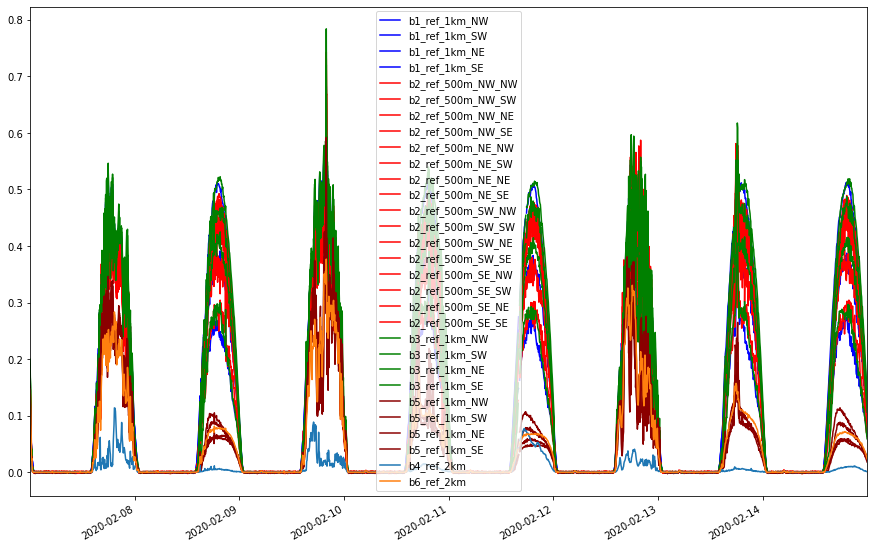

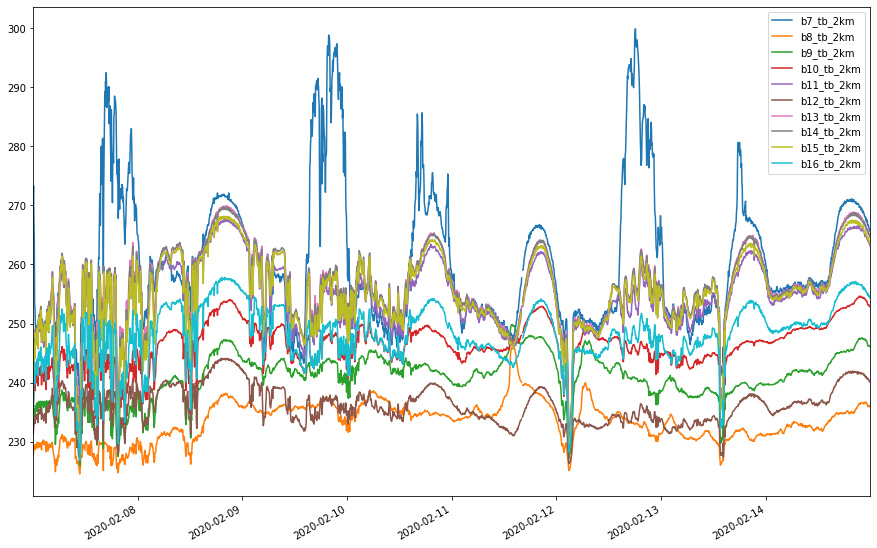

In [10]:
plt.figure(figsize=(15,10))

df.b1_ref_1km_NW.plot(c='b')
df.b1_ref_1km_SW.plot(c='b')
df.b1_ref_1km_NE.plot(c='b')
df.b1_ref_1km_SE.plot(c='b')

df.b2_ref_500m_NW_NW.plot(c='r')
df.b2_ref_500m_NW_SW.plot(c='r')
df.b2_ref_500m_NW_NE.plot(c='r')
df.b2_ref_500m_NW_SE.plot(c='r')
df.b2_ref_500m_NE_NW.plot(c='r')
df.b2_ref_500m_NE_SW.plot(c='r')
df.b2_ref_500m_NE_NE.plot(c='r')
df.b2_ref_500m_NE_SE.plot(c='r')
df.b2_ref_500m_SW_NW.plot(c='r')
df.b2_ref_500m_SW_SW.plot(c='r')
df.b2_ref_500m_SW_NE.plot(c='r')
df.b2_ref_500m_SW_SE.plot(c='r')
df.b2_ref_500m_SE_NW.plot(c='r')
df.b2_ref_500m_SE_SW.plot(c='r')
df.b2_ref_500m_SE_NE.plot(c='r')
df.b2_ref_500m_SE_SE.plot(c='r')

df.b3_ref_1km_NW.plot(c='g')
df.b3_ref_1km_SW.plot(c='g')
df.b3_ref_1km_NE.plot(c='g')
df.b3_ref_1km_SE.plot(c='g')

df.b5_ref_1km_NW.plot(c='darkred')
df.b5_ref_1km_SW.plot(c='darkred')
df.b5_ref_1km_NE.plot(c='darkred')
df.b5_ref_1km_SE.plot(c='darkred')

df.b4_ref_2km.plot()
df.b6_ref_2km.plot()


plt.legend()

plt.figure(figsize=(15,10))
df.b7_tb_2km.plot()
df.b8_tb_2km.plot()
df.b9_tb_2km.plot()
df.b10_tb_2km.plot()
df.b11_tb_2km.plot()
df.b12_tb_2km.plot()
df.b13_tb_2km.plot()
df.b14_tb_2km.plot()
df.b15_tb_2km.plot()
df.b16_tb_2km.plot()
plt.legend()

In [11]:
#%matplotlib inline
#
#plt.plot(df.t, df.b11_tb_2km.values - df.b13_tb_2km.values)

In [12]:
#a = np.array([df.b7_tb_2km.values,
#df.b8_tb_2km.values,
#df.b9_tb_2km.values,
#df.b10_tb_2km.values,
#df.b11_tb_2km.values,
#df.b12_tb_2km.values,
#df.b13_tb_2km.values,
#df.b14_tb_2km.values,
#df.b15_tb_2km.values,
#df.b16_tb_2km.values])
#
#wavelengths = [3.9, 6.2, 6.9, 7.3, 8.4, 9.6, 10.3, 11.2, 12.3, 13.3]

In [13]:
#%matplotlib notebook
#from ipywidgets import *
#import numpy as np
#import matplotlib.pyplot as plt
#
#x = 0
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#line, = ax.plot(wavelengths, a[:,x],'o-')
#ax.set_ylim(200,300)
#ax.set_title(df.t.values[x])
#ax.set_ylabel('Brightness Temperature, K')
#ax.set_xlabel('Wavelength, um')
#
#def update(w = (0,a.shape[1]-1)):
#    line.set_ydata(a[:,x+w])
#    ax.set_title(df.t.values[x+w])
#    fig.canvas.draw_idle()
#
#interact(update);

(737466.0, 737468.5)

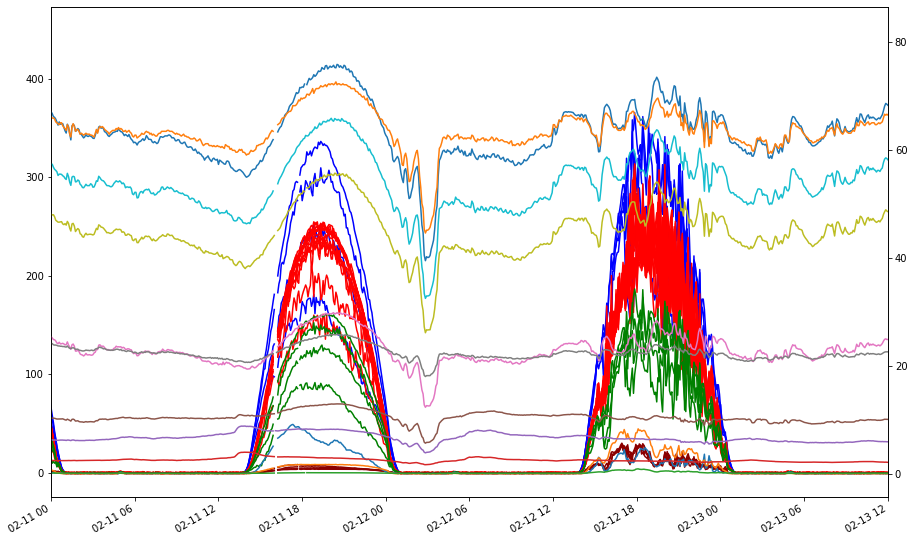

In [14]:
plt.figure(figsize=(15,10))

df.b1_rad_1km_NW.plot(c='b')
df.b1_rad_1km_SW.plot(c='b')
df.b1_rad_1km_NE.plot(c='b')
df.b1_rad_1km_SE.plot(c='b')

df.b2_rad_500m_NW_NW.plot(c='r')
df.b2_rad_500m_NW_SW.plot(c='r')
df.b2_rad_500m_NW_NE.plot(c='r')
df.b2_rad_500m_NW_SE.plot(c='r')
df.b2_rad_500m_NE_NW.plot(c='r')
df.b2_rad_500m_NE_SW.plot(c='r')
df.b2_rad_500m_NE_NE.plot(c='r')
df.b2_rad_500m_NE_SE.plot(c='r')
df.b2_rad_500m_SW_NW.plot(c='r')
df.b2_rad_500m_SW_SW.plot(c='r')
df.b2_rad_500m_SW_NE.plot(c='r')
df.b2_rad_500m_SW_SE.plot(c='r')
df.b2_rad_500m_SE_NW.plot(c='r')
df.b2_rad_500m_SE_SW.plot(c='r')
df.b2_rad_500m_SE_NE.plot(c='r')
df.b2_rad_500m_SE_SE.plot(c='r')

df.b3_rad_1km_NW.plot(c='g')
df.b3_rad_1km_SW.plot(c='g')
df.b3_rad_1km_NE.plot(c='g')
df.b3_rad_1km_SE.plot(c='g')

df.b5_rad_1km_NW.plot(c='darkred')
df.b5_rad_1km_SW.plot(c='darkred')
df.b5_rad_1km_NE.plot(c='darkred')
df.b5_rad_1km_SE.plot(c='darkred')

ax2 = plt.gca().twinx()
df.b4_rad_2km.plot(ax=ax2)
df.b6_rad_2km.plot(ax=ax2)
df.b7_rad_2km.plot(ax=ax2)
df.b8_rad_2km.plot(ax=ax2)
df.b9_rad_2km.plot(ax=ax2)
df.b10_rad_2km.plot(ax=ax2)
df.b11_rad_2km.plot(ax=ax2)
df.b12_rad_2km.plot(ax=ax2)
df.b13_rad_2km.plot(ax=ax2)
df.b14_rad_2km.plot(ax=ax2)
df.b15_rad_2km.plot(ax=ax2)
df.b16_rad_2km.plot(ax=ax2)

plt.xlim(pd.Timestamp('2020-02-11'),pd.Timestamp('2020-02-13 12'))

(737466.0, 737467.5)

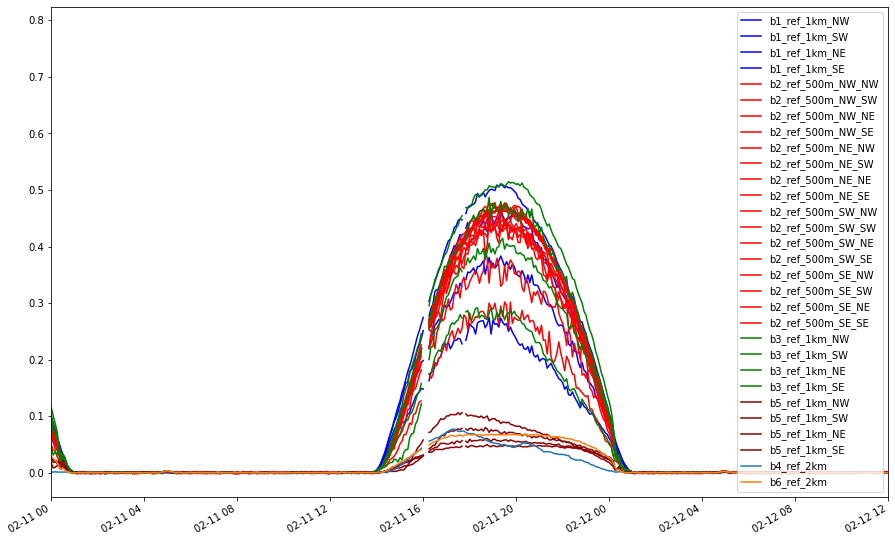

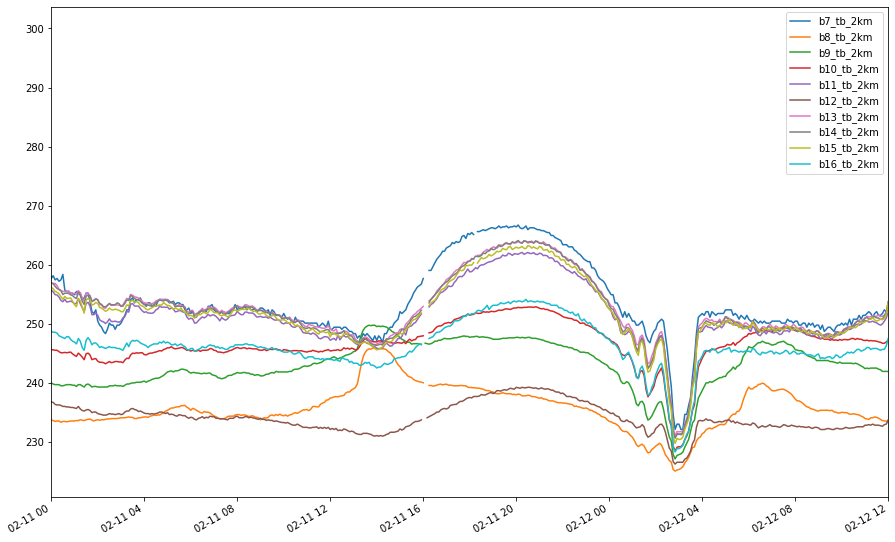

In [15]:
plt.figure(figsize=(15,10))

df.b1_ref_1km_NW.plot(c='b')
df.b1_ref_1km_SW.plot(c='b')
df.b1_ref_1km_NE.plot(c='b')
df.b1_ref_1km_SE.plot(c='b')

df.b2_ref_500m_NW_NW.plot(c='r')
df.b2_ref_500m_NW_SW.plot(c='r')
df.b2_ref_500m_NW_NE.plot(c='r')
df.b2_ref_500m_NW_SE.plot(c='r')
df.b2_ref_500m_NE_NW.plot(c='r')
df.b2_ref_500m_NE_SW.plot(c='r')
df.b2_ref_500m_NE_NE.plot(c='r')
df.b2_ref_500m_NE_SE.plot(c='r')
df.b2_ref_500m_SW_NW.plot(c='r')
df.b2_ref_500m_SW_SW.plot(c='r')
df.b2_ref_500m_SW_NE.plot(c='r')
df.b2_ref_500m_SW_SE.plot(c='r')
df.b2_ref_500m_SE_NW.plot(c='r')
df.b2_ref_500m_SE_SW.plot(c='r')
df.b2_ref_500m_SE_NE.plot(c='r')
df.b2_ref_500m_SE_SE.plot(c='r')

df.b3_ref_1km_NW.plot(c='g')
df.b3_ref_1km_SW.plot(c='g')
df.b3_ref_1km_NE.plot(c='g')
df.b3_ref_1km_SE.plot(c='g')

df.b5_ref_1km_NW.plot(c='darkred')
df.b5_ref_1km_SW.plot(c='darkred')
df.b5_ref_1km_NE.plot(c='darkred')
df.b5_ref_1km_SE.plot(c='darkred')

df.b4_ref_2km.plot()
df.b6_ref_2km.plot()


plt.legend(loc='center right')
plt.xlim(pd.Timestamp('2020-02-11'),pd.Timestamp('2020-02-12 12'))

plt.figure(figsize=(15,10))
df.b7_tb_2km.plot()
df.b8_tb_2km.plot()
df.b9_tb_2km.plot()
df.b10_tb_2km.plot()
df.b11_tb_2km.plot()
df.b12_tb_2km.plot()
df.b13_tb_2km.plot()
df.b14_tb_2km.plot()
df.b15_tb_2km.plot()
df.b16_tb_2km.plot()
plt.legend()
plt.xlim(pd.Timestamp('2020-02-11'),pd.Timestamp('2020-02-12 12'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

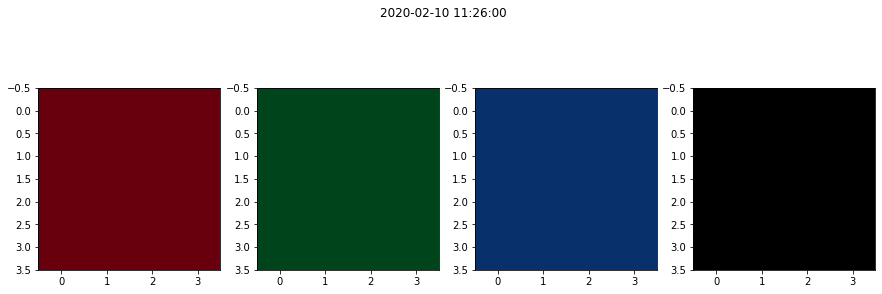

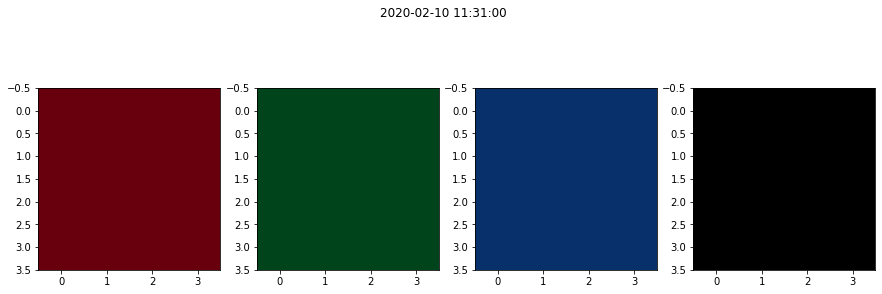

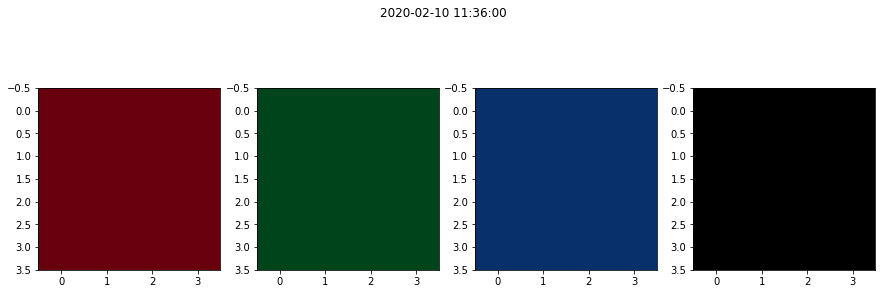

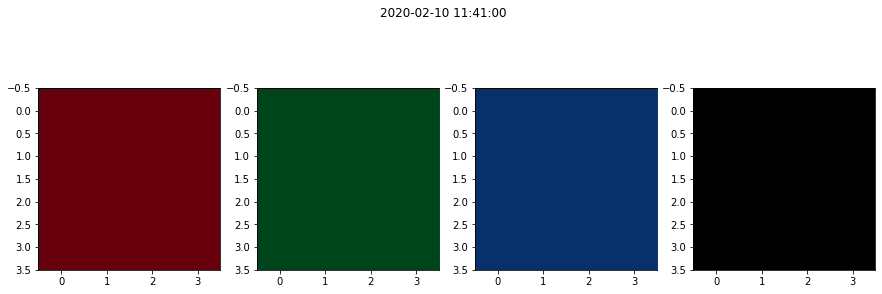

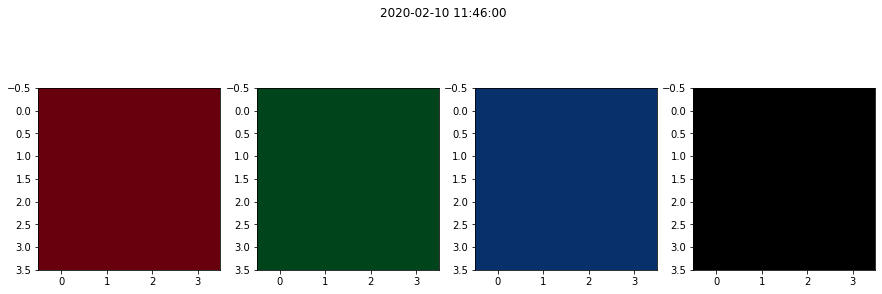

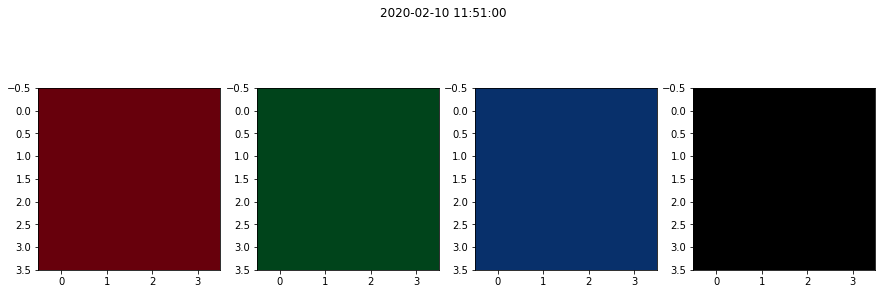

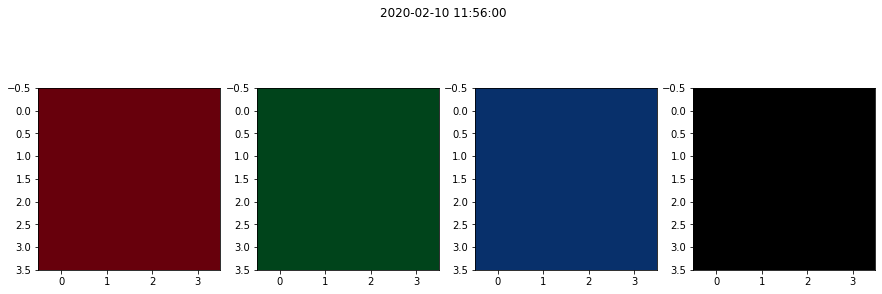

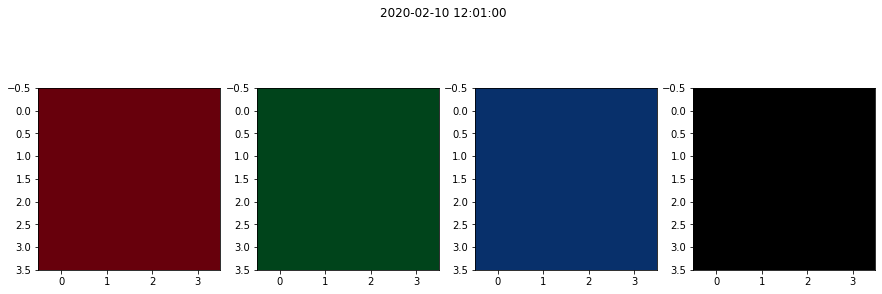

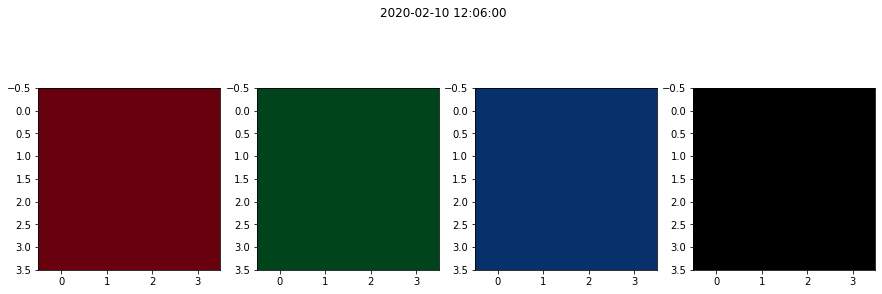

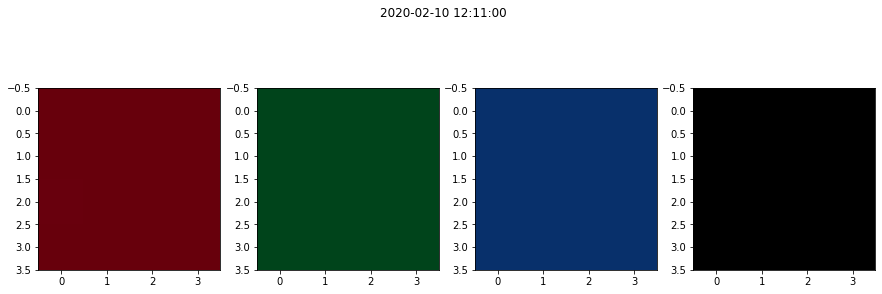

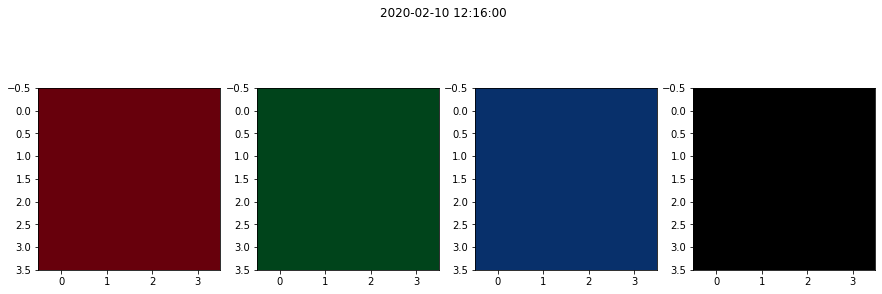

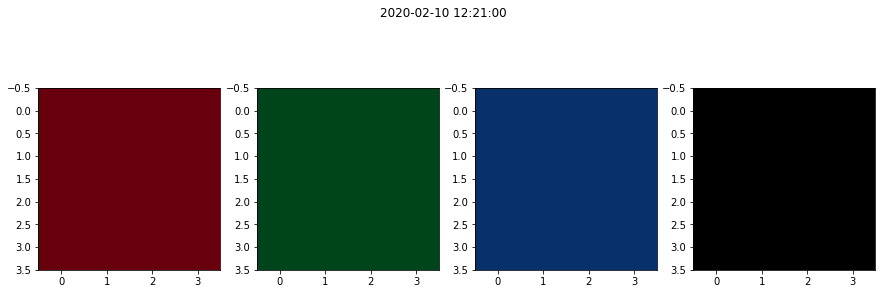

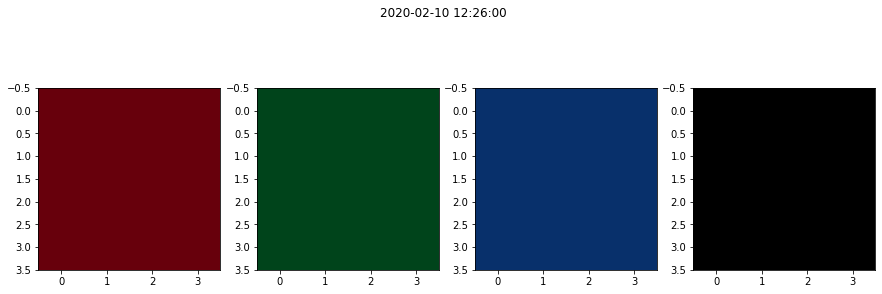

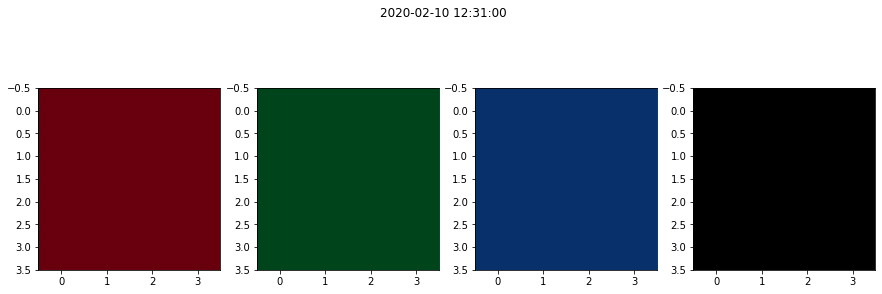

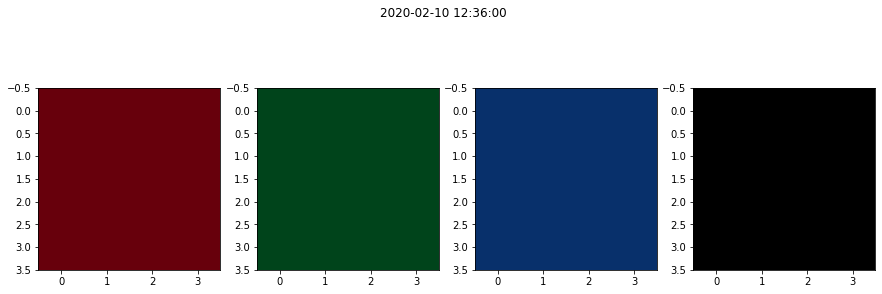

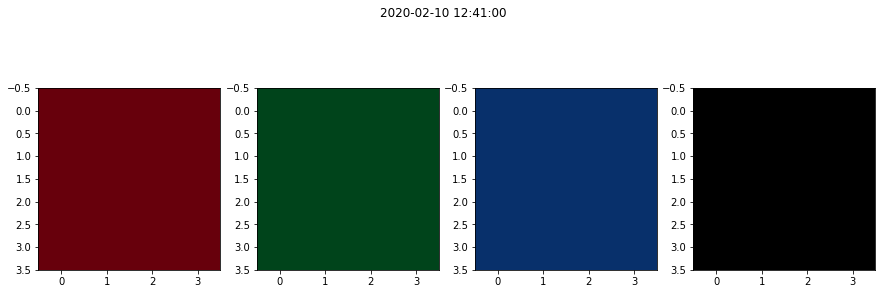

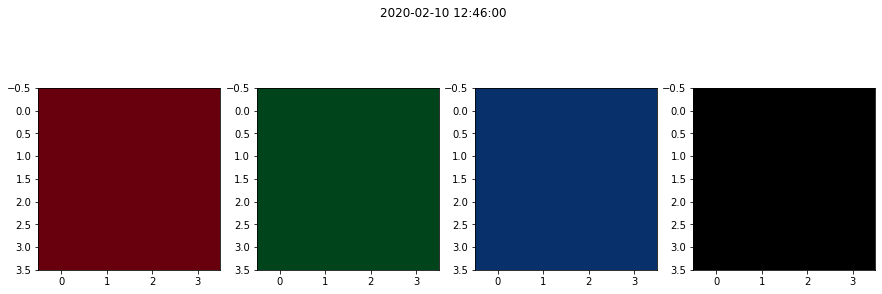

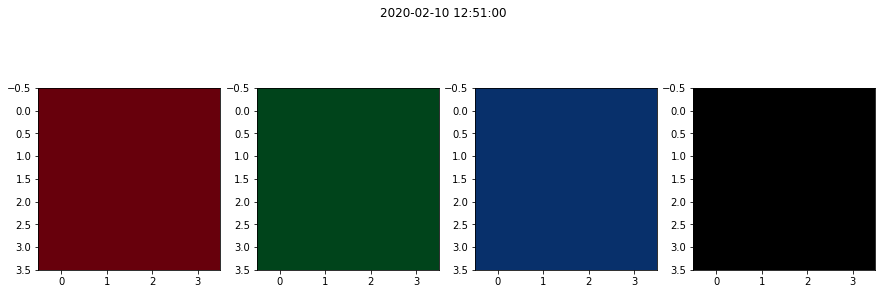

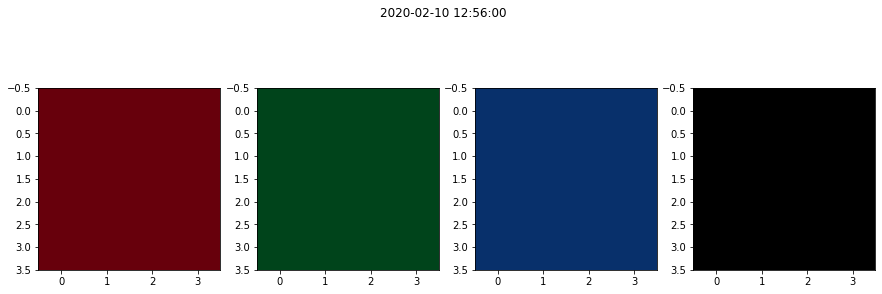

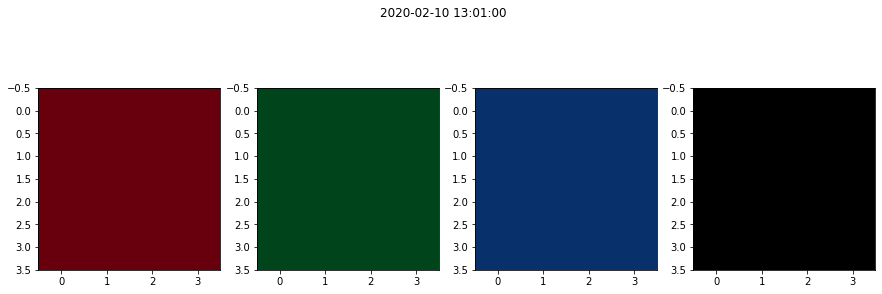

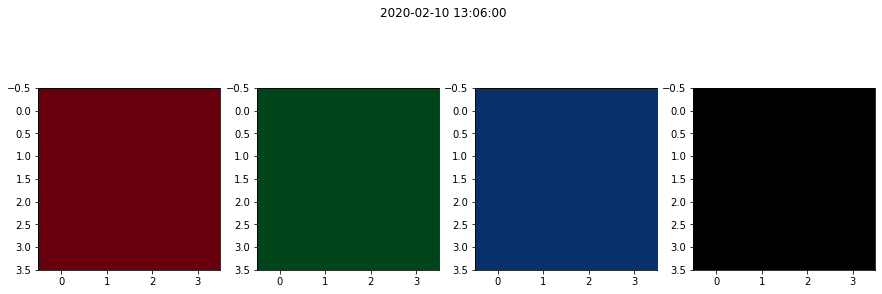

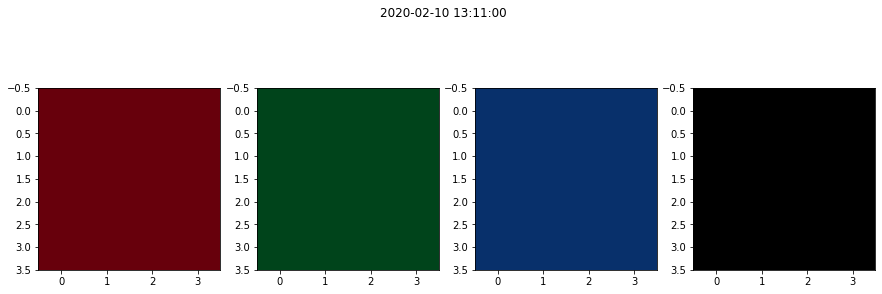

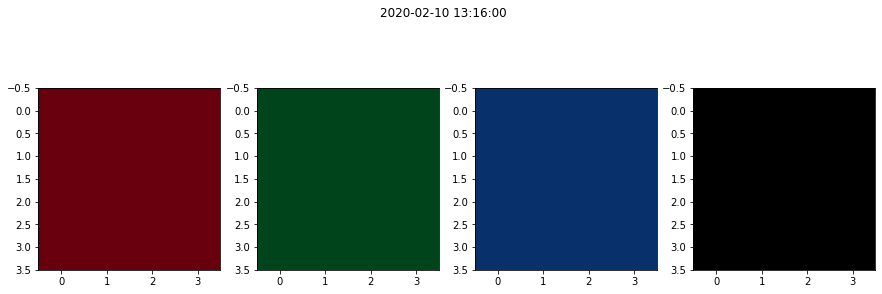

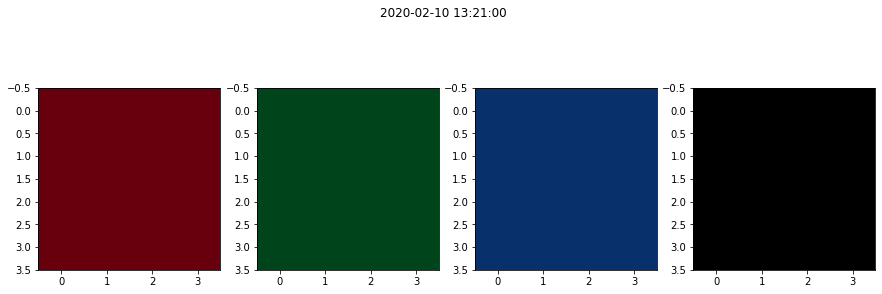

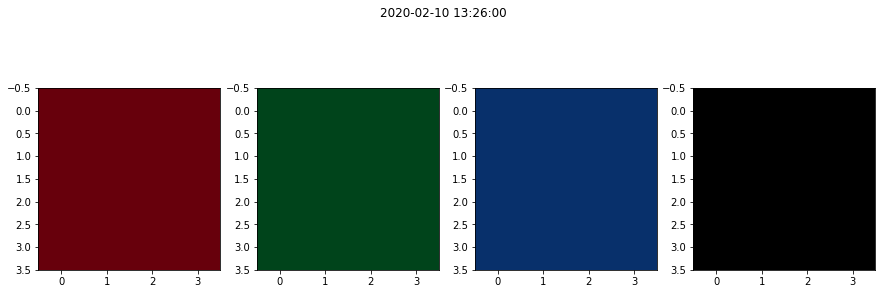

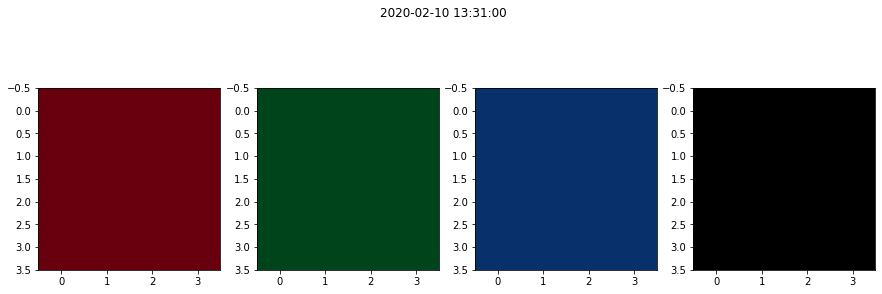

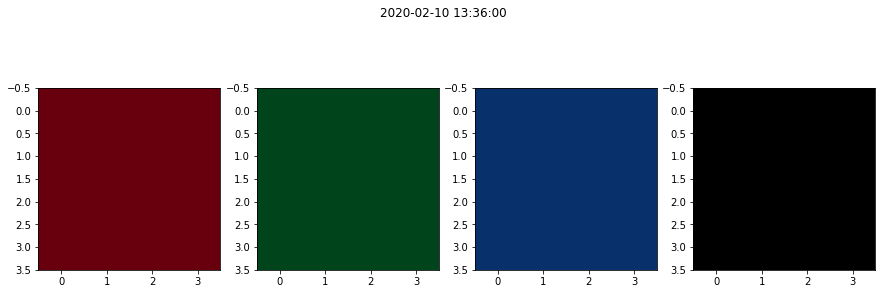

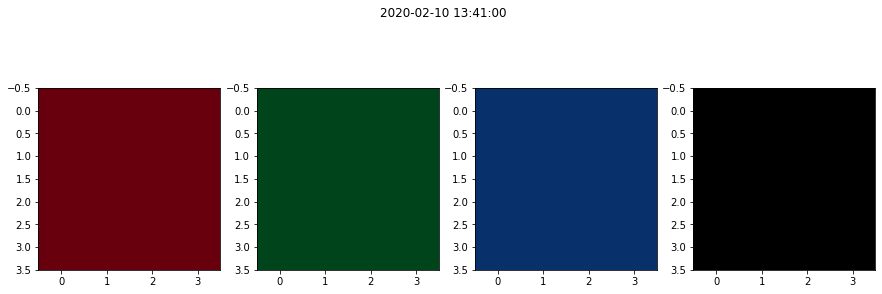

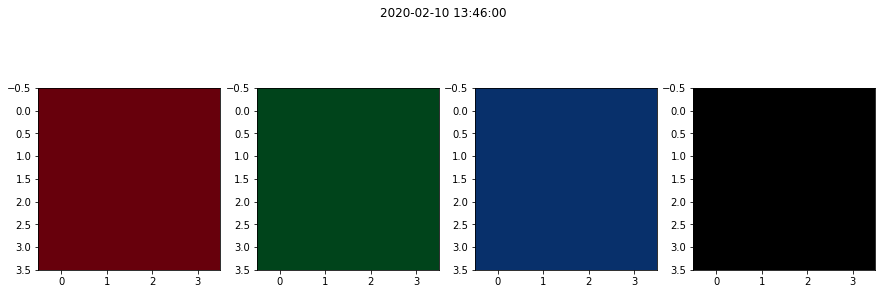

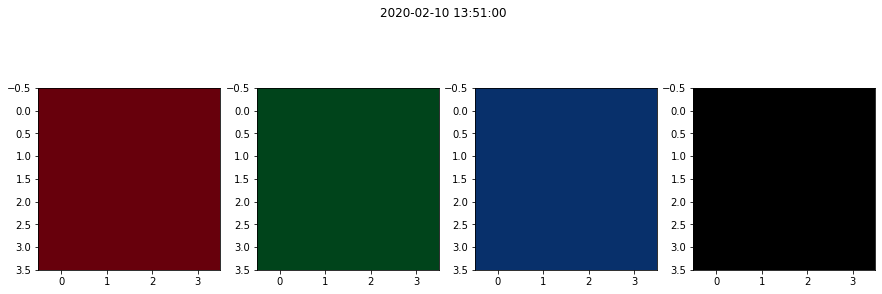

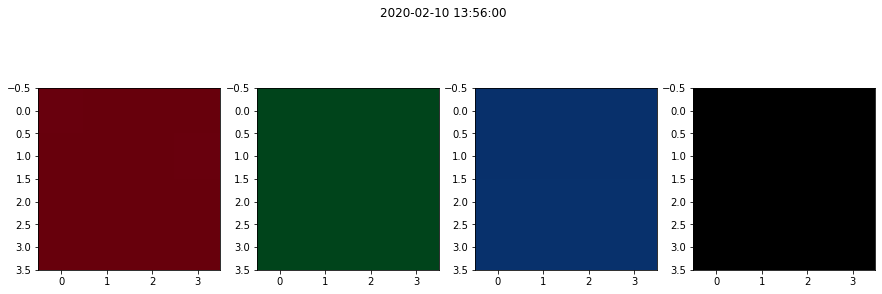

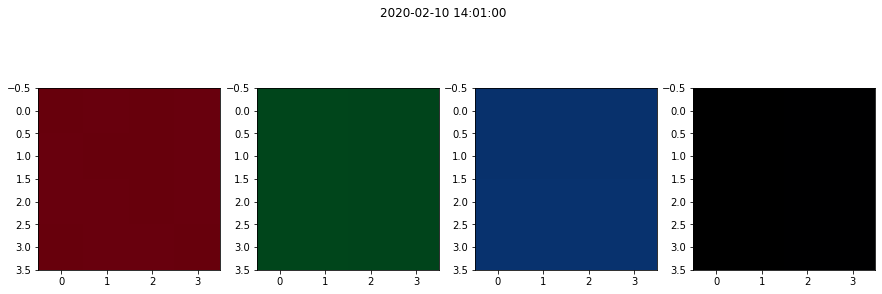

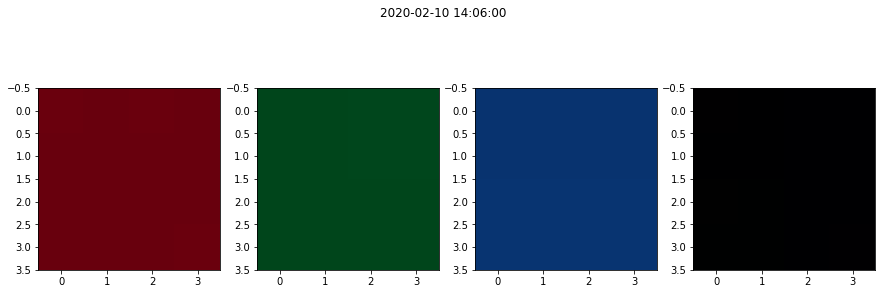

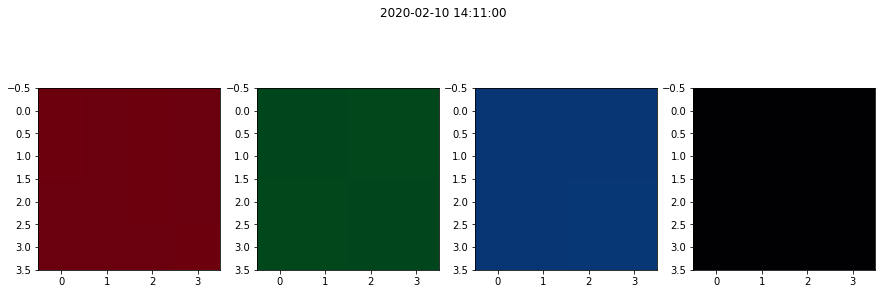

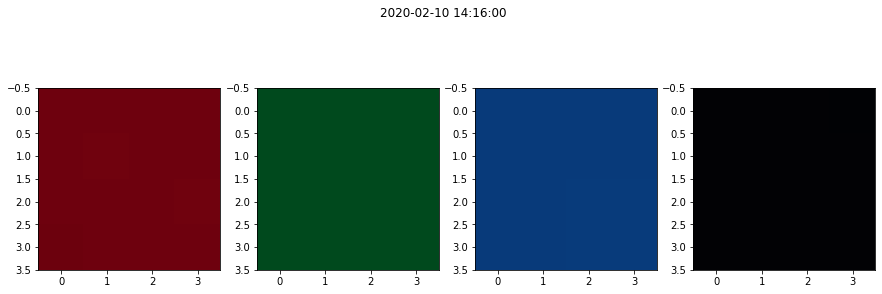

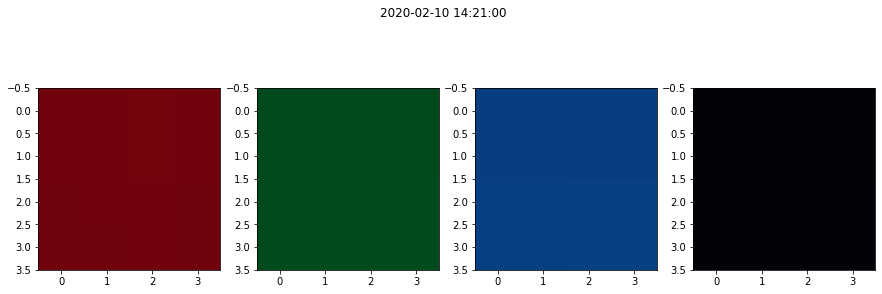

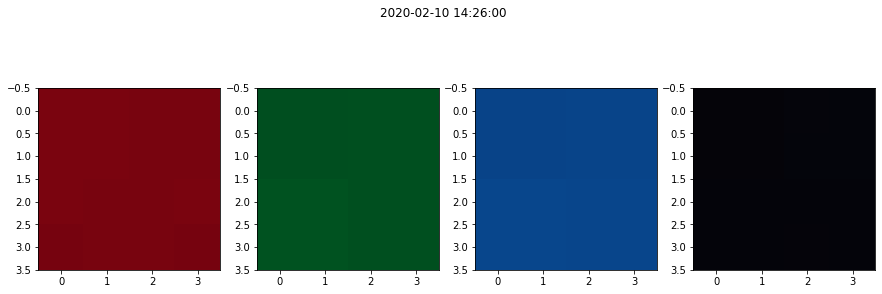

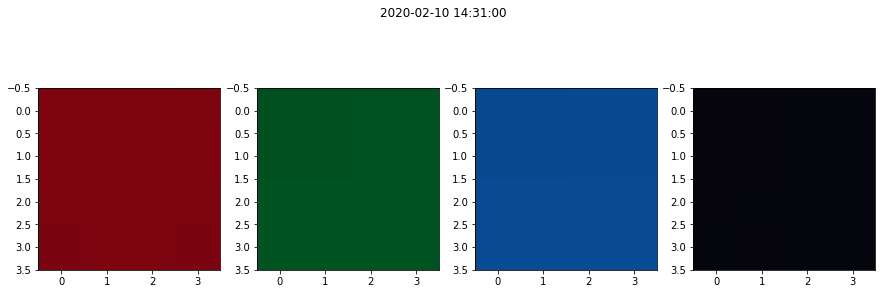

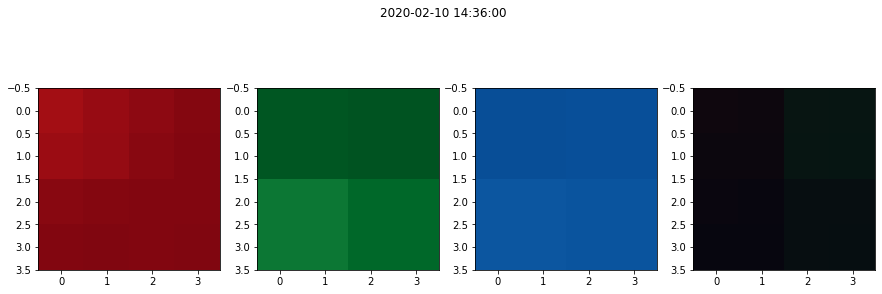

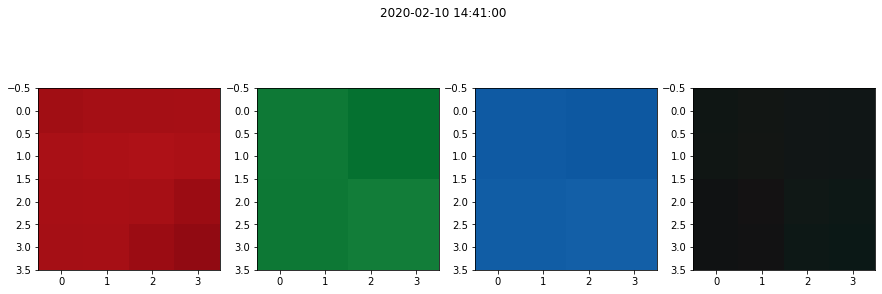

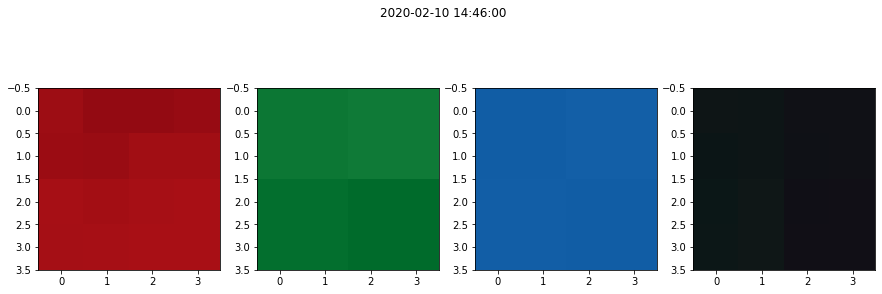

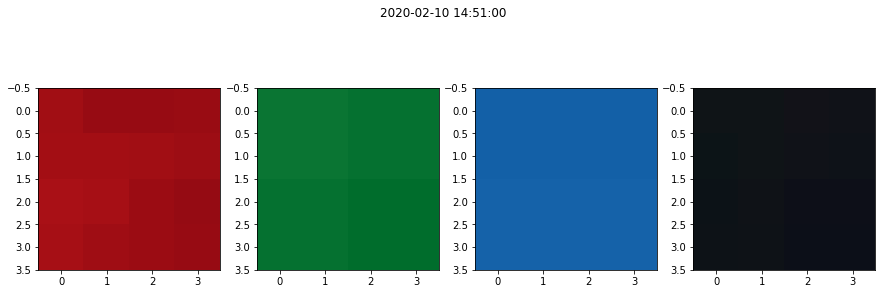

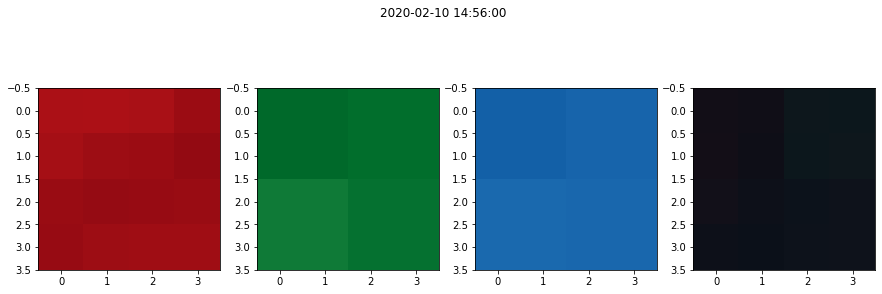

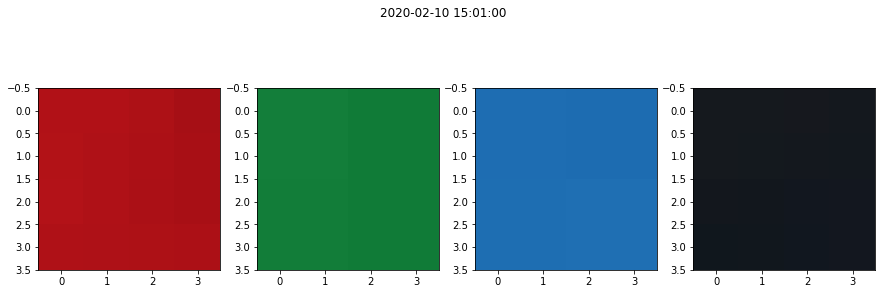

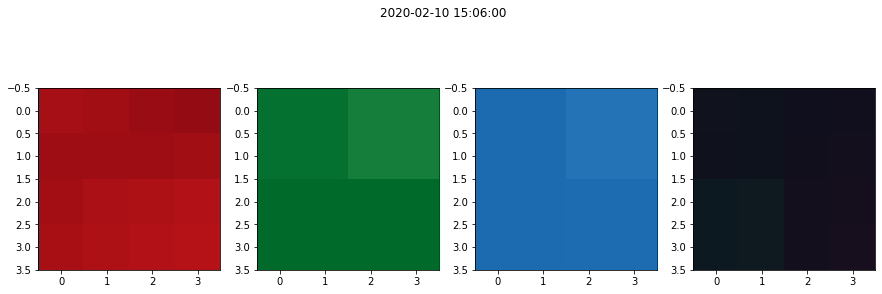

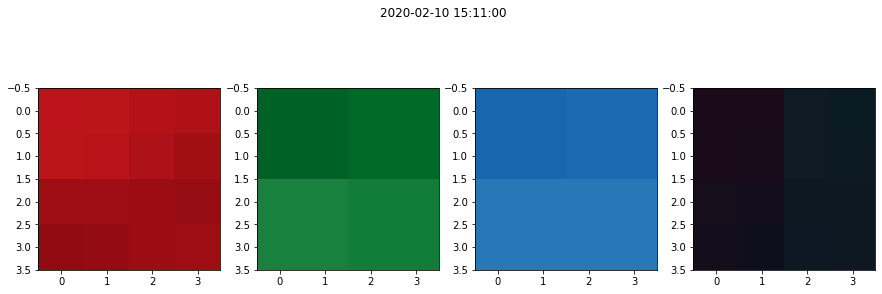

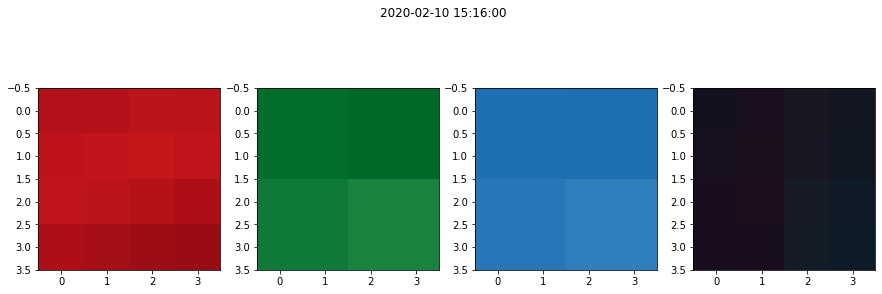

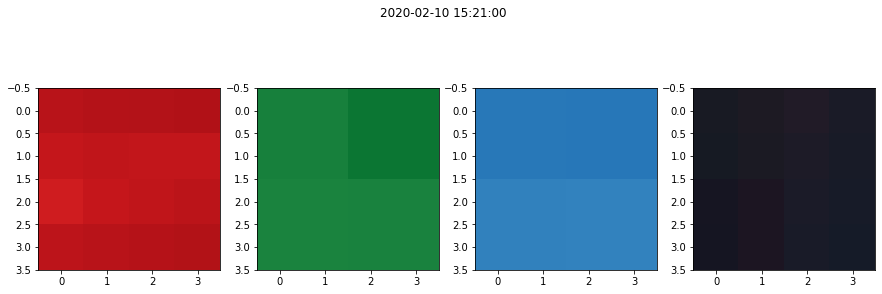

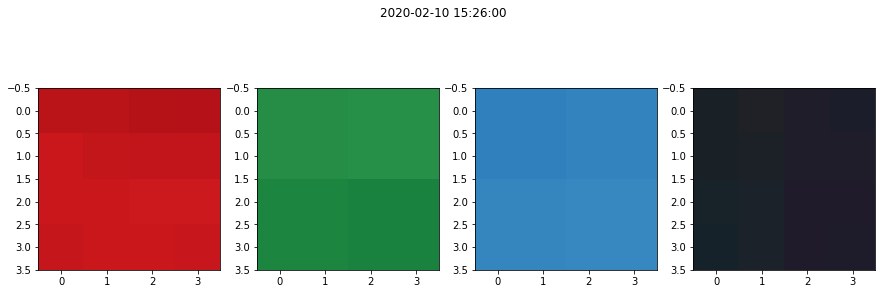

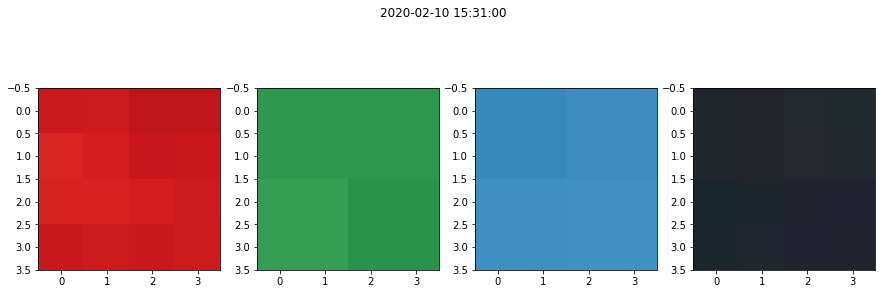

In [146]:
x=0
for idx, row in df.iterrows():
    if x>1000 and x<=1050:
        b2_array = np.array([row.b2_ref_500m_NW_NW, row.b2_ref_500m_NW_NE, row.b2_ref_500m_NE_NW, row.b2_ref_500m_NE_NE, 
                             row.b2_ref_500m_NW_SW, row.b2_ref_500m_NW_SE, row.b2_ref_500m_NE_SW, row.b2_ref_500m_NE_SE, 
                             row.b2_ref_500m_SW_NW, row.b2_ref_500m_SW_NE, row.b2_ref_500m_SE_NW, row.b2_ref_500m_SE_NE, 
                             row.b2_ref_500m_SW_SW, row.b2_ref_500m_SW_SE, row.b2_ref_500m_SE_SW, row.b2_ref_500m_SE_SE])
        b2_array = b2_array.reshape(4,4)
        b1_array = np.array([row.b1_ref_1km_NW, row.b1_ref_1km_NE, 
                             row.b1_ref_1km_SW, row.b1_ref_1km_SE]).reshape(2,2)
        b1_array = np.repeat(np.repeat(b1_array, 2, axis=0), 2, axis=1)
        b3_array = np.array([row.b3_ref_1km_NW, row.b3_ref_1km_NE, 
                             row.b3_ref_1km_SW, row.b3_ref_1km_SE]).reshape(2,2)
        b3_array = np.repeat(np.repeat(b3_array, 2, axis=0), 2, axis=1)
        RGB_array = np.array([b2_array, b3_array, b1_array]).T
        f, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1,ncols=4,figsize=(15,5))
        ax1.imshow(b2_array, vmin=0, vmax=0.5, cmap='Reds_r')
        ax2.imshow(b3_array, vmin=0, vmax=0.5, cmap='Greens_r')
        ax3.imshow(b1_array, vmin=0, vmax=0.5, cmap='Blues_r')
        ax4.imshow(RGB_array, vmin=0, vmax=0.5)
        plt.suptitle(idx)
    x+=1

In [56]:
!ls /storage/GOES/goes16/2019/10/11/ABI-L1b-RadC/17/C02/

OR_ABI-L1b-RadC-M6C02_G16_s20192841701271_e20192841704044_c20192841704098.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841706271_e20192841709044_c20192841709084.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841711271_e20192841714044_c20192841714096.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841716271_e20192841719044_c20192841719086.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841721271_e20192841724044_c20192841724099.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841726271_e20192841729044_c20192841729086.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841731271_e20192841734044_c20192841734095.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841736271_e20192841739044_c20192841739087.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841741271_e20192841744044_c20192841744108.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841746271_e20192841749044_c20192841749087.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841751271_e20192841754044_c20192841754099.nc
OR_ABI-L1b-RadC-M6C02_G16_s20192841756271_e20192841759044_c20192841759094.nc


In [57]:
ds1 = xr.open_dataset('/storage/GOES/goes16/2019/10/11/ABI-L1b-RadC/16/C02/OR_ABI-L1b-RadC-M6C02_G16_s20192841601271_e20192841604044_c20192841604093.nc')
ds2 = xr.open_dataset('/storage/GOES/goes16/2019/10/11/ABI-L1b-RadC/16/C02/OR_ABI-L1b-RadC-M6C02_G16_s20192841631271_e20192841634044_c20192841634100.nc')
ds3 = xr.open_dataset('/storage/GOES/goes16/2019/10/11/ABI-L1b-RadC/17/C02/OR_ABI-L1b-RadC-M6C02_G16_s20192841756271_e20192841759044_c20192841759094.nc')

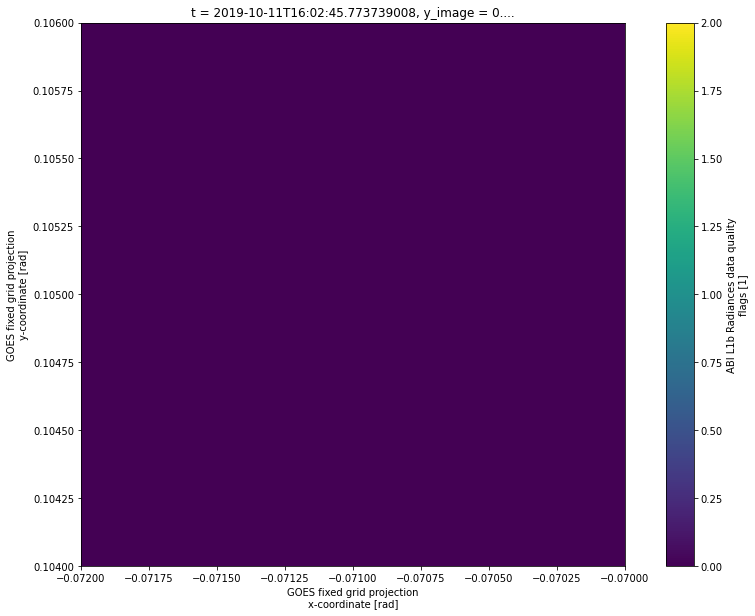

In [58]:
plt.figure(figsize=(15,10))
ds1.DQF.plot()
plt.xlim(-0.072, -0.070)
plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

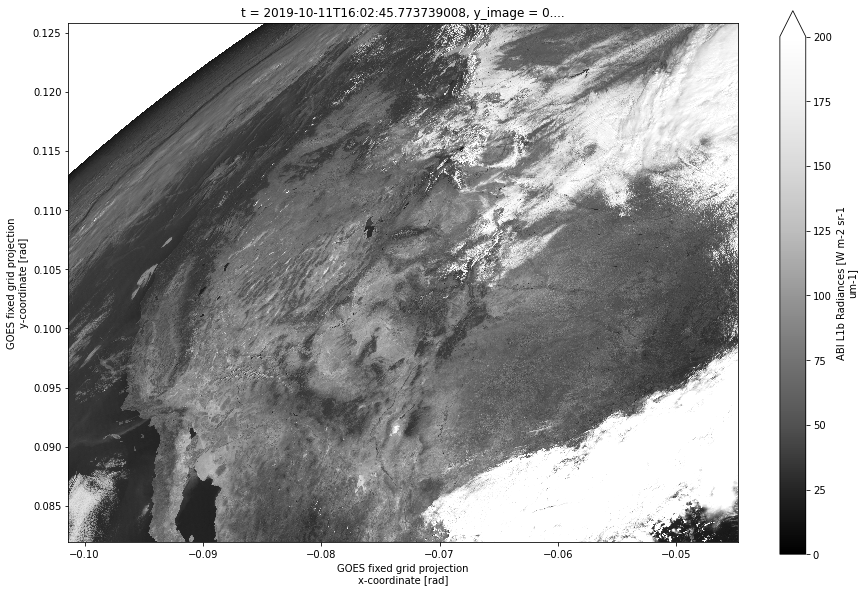

In [59]:
plt.figure(figsize=(15,10))
ds1.Rad.plot(vmin=0, vmax=200, cmap='Greys_r')
#plt.xlim(-0.072, -0.070)
#plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

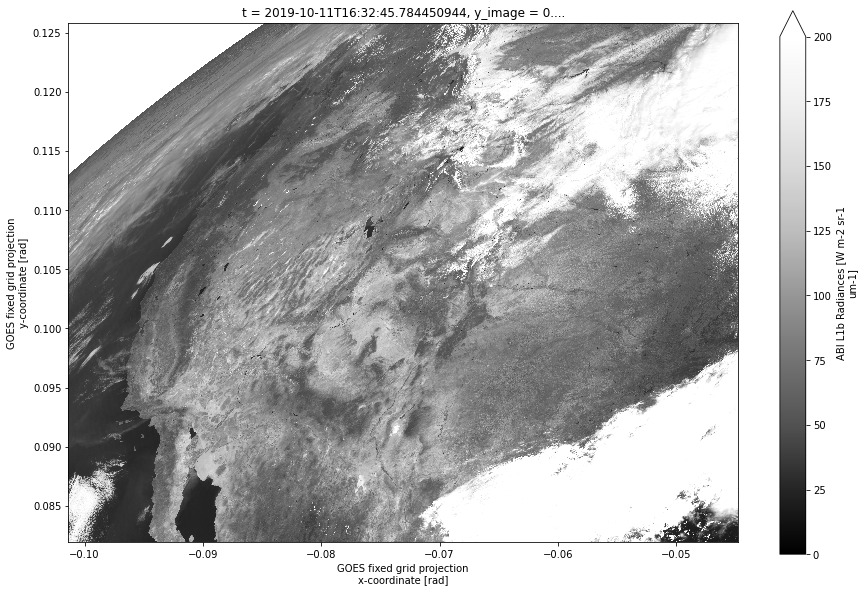

In [60]:
plt.figure(figsize=(15,10))
ds2.Rad.plot(vmin=0, vmax=200, cmap='Greys_r')
#plt.xlim(-0.072, -0.070)
#plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

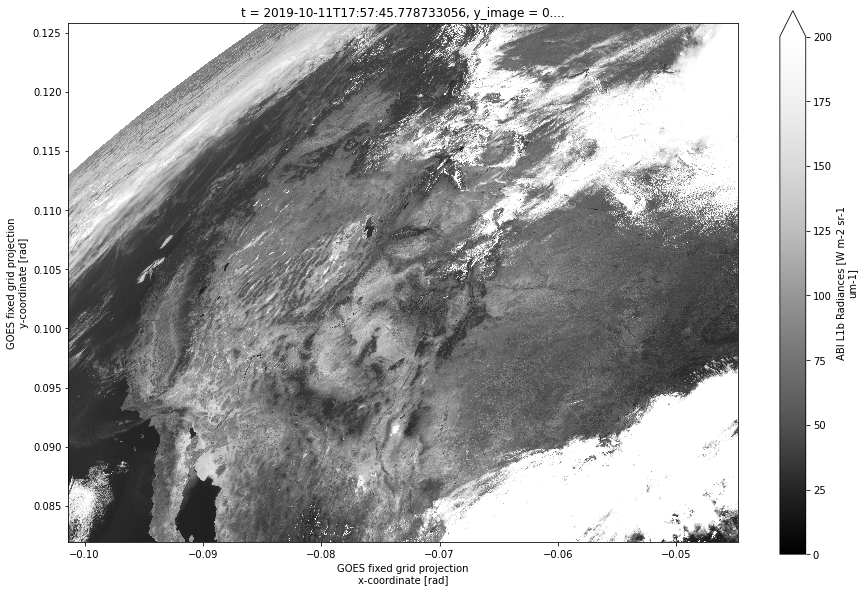

In [61]:
plt.figure(figsize=(15,10))
ds3.Rad.plot(vmin=0, vmax=200, cmap='Greys_r')
#plt.xlim(-0.072, -0.070)
#plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

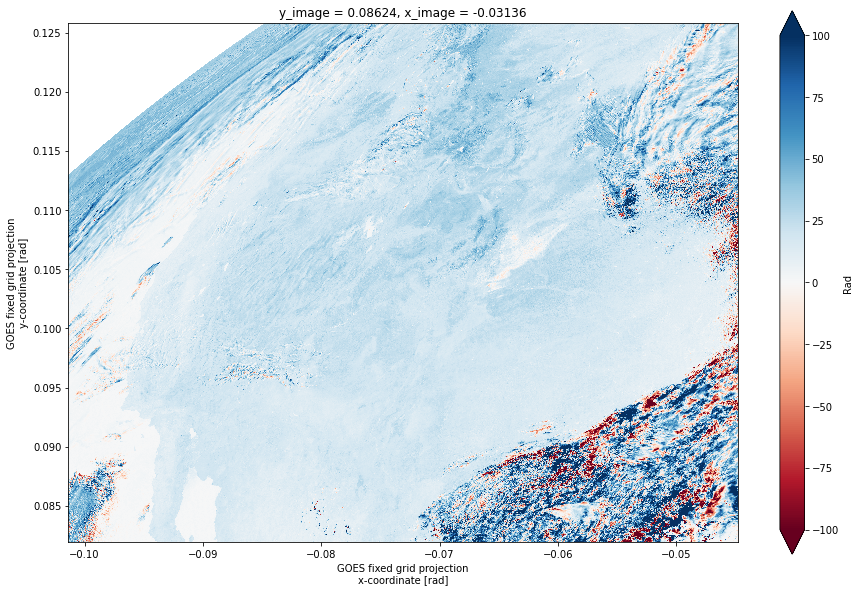

In [66]:
plt.figure(figsize=(15,10))
(ds2.Rad-ds1.Rad).plot(vmin=-100, vmax=100, cmap='RdBu')
#plt.xlim(-0.072, -0.070)
#plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

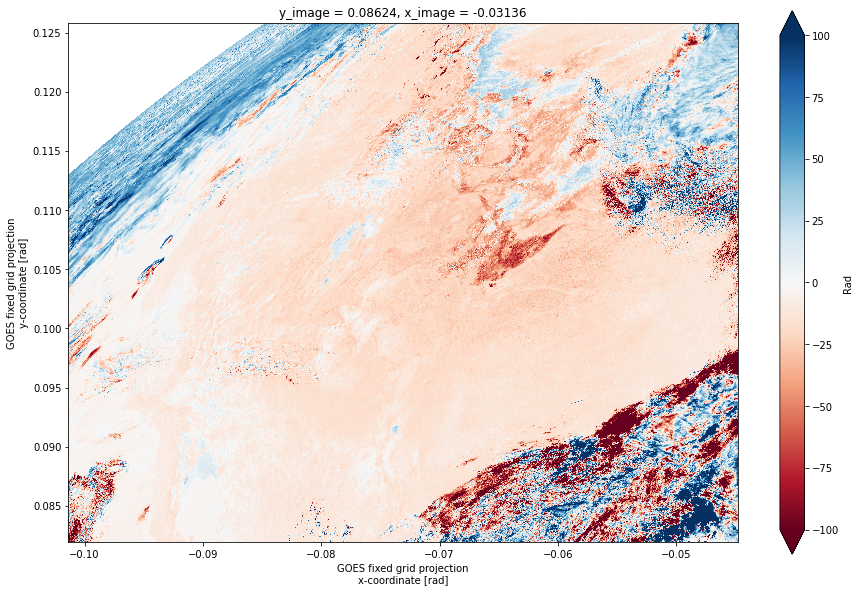

In [67]:
plt.figure(figsize=(15,10))
(ds3.Rad-ds2.Rad).plot(vmin=-100, vmax=100, cmap='RdBuq')
#plt.xlim(-0.072, -0.070)
#plt.ylim(0.104, 0.106)
plt.gca().set_aspect(1)

In [25]:
merged_ds = xr.merge(data_list)

In [44]:
merged_df = merged_ds.to_dataframe()

In [49]:
merged_df

y_image  x_image  rad  ref  tb
band t                   x         y                                       
1    2020-02-08 00:01:00 -0.071001 0.104727  0.08624 -0.03136  NaN  NaN NaN
                                   0.104734  0.08624 -0.03136  NaN  NaN NaN
                                   0.104741  0.08624 -0.03136  NaN  NaN NaN
                                   0.104748  0.08624 -0.03136  NaN  NaN NaN
                                   0.104755  0.08624 -0.03136  NaN  NaN NaN
...                                              ...      ...  ...  ...  ..
16   2020-02-08 00:56:00 -0.070959 0.104741  0.08624 -0.03136  NaN  NaN NaN
                                   0.104748  0.08624 -0.03136  NaN  NaN NaN
                                   0.104755  0.08624 -0.03136  NaN  NaN NaN
                                   0.104762  0.08624 -0.03136  NaN  NaN NaN
                                   0.104769  0.08624 -0.03136  NaN  NaN NaN

[9408 rows x 5 columns]

In [57]:
merged_df.unstack(level=0)

y_image                             \
band                                         1        2        3        4    
t                   x         y                                              
2020-02-08 00:01:00 -0.071001 0.104727  0.08624  0.08624  0.08624  0.08624   
                              0.104734  0.08624  0.08624  0.08624  0.08624   
                              0.104741  0.08624  0.08624  0.08624  0.08624   
                              0.104748  0.08624  0.08624  0.08624  0.08624   
                              0.104755  0.08624  0.08624  0.08624  0.08624   
...                                         ...      ...      ...      ...   
2020-02-08 00:56:00 -0.070959 0.104741  0.08624  0.08624  0.08624  0.08624   
                              0.104748  0.08624  0.08624  0.08624  0.08624   
                              0.104755  0.08624  0.08624  0.08624  0.08624   
                              0.104762  0.08624  0.08624  0.08624  0.08624   
                              0.104769  0.08624  0.08624  0.08624  0.08624   

                                                                            \
band                                         5        6        7        8    
t                   x         y                                              
2020-02-08 00:01:00 -0.071001 0.104727  0.08624  0.08624  0.08624  0.08624   
                              0.104734  0.08624  0.08624  0.08624  0.08624   
                              0.104741  0.08624  0.08624  0.08624  0.08624   
                              0.104748  0.08624  0.08624  0.08624  0.08624   
                              0.104755  0.08624  0.08624  0.08624  0.08624   
...                                         ...      ...      ...      ...   
2020-02-08 00:56:00 -0.070959 0.104741  0.08624  0.08624  0.08624  0.08624   
                              0.104748  0.08624  0.08624  0.08624  0.08624   
                              0.104755  0.08624  0.08624  0.08624  0.08624   
                              0.104762  0.08624  0.08624  0.08624  0.08624   
                              0.104769  0.08624  0.08624  0.08624  0.08624   

                                                          ...  tb              \
band                                         9        10  ...  7   8   9   10   
t                   x         y                           ...                   
2020-02-08 00:01:00 -0.071001 0.104727  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104734  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104741  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104748  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104755  0.08624  0.08624  ... NaN NaN NaN NaN   
...                                         ...      ...  ...  ..  ..  ..  ..   
2020-02-08 00:56:00 -0.070959 0.104741  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104748  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104755  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104762  0.08624  0.08624  ... NaN NaN NaN NaN   
                              0.104769  0.08624  0.08624  ... NaN NaN NaN NaN   

                                                                
band                                    11  12  13  14  15  16  
t                   x         y                                 
2020-02-08 00:01:00 -0.071001 0.104727 NaN NaN NaN NaN NaN NaN  
                              0.104734 NaN NaN NaN NaN NaN NaN  
                              0.104741 NaN NaN NaN NaN NaN NaN  
                              0.104748 NaN NaN NaN NaN NaN NaN  
                              0.104755 NaN NaN NaN NaN NaN NaN  
...                                     ..  ..  ..  ..  ..  ..  
2020-02-08 00:56:00 -0.070959 0.104741 NaN NaN NaN NaN NaN NaN  
                              0.104748 NaN NaN NaN NaN NaN NaN  
    

In [6]:
merged_ds.to_netcdf('test_merged.nc')

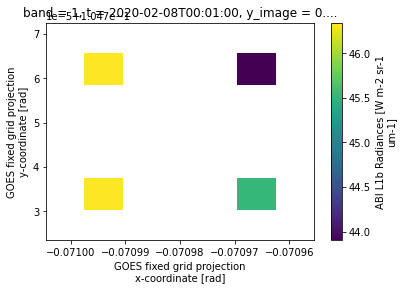

In [13]:
merged_ds.rad.sel(band=1).isel(t=0).plot()

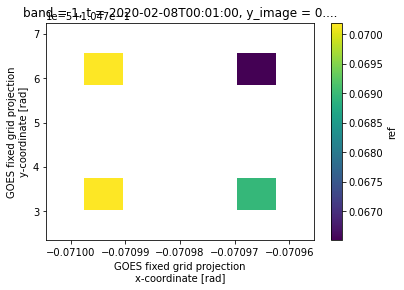

In [8]:
merged_ds.sel(band=1).isel(t=0).ref.plot()

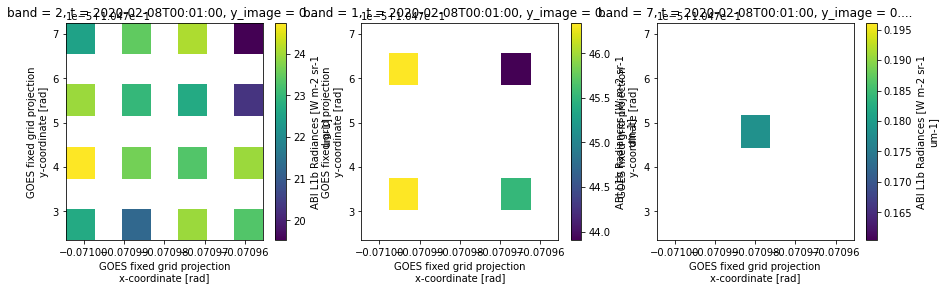

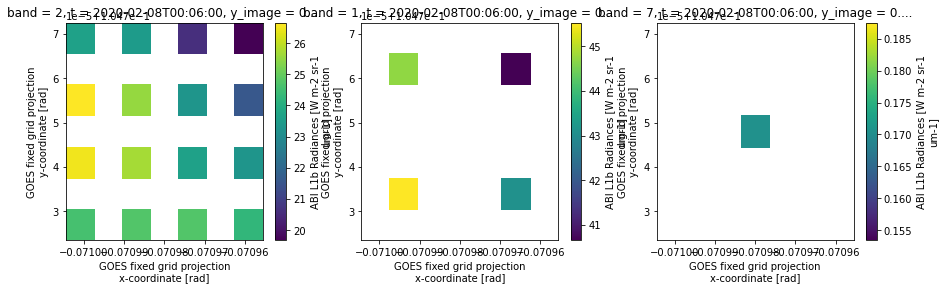

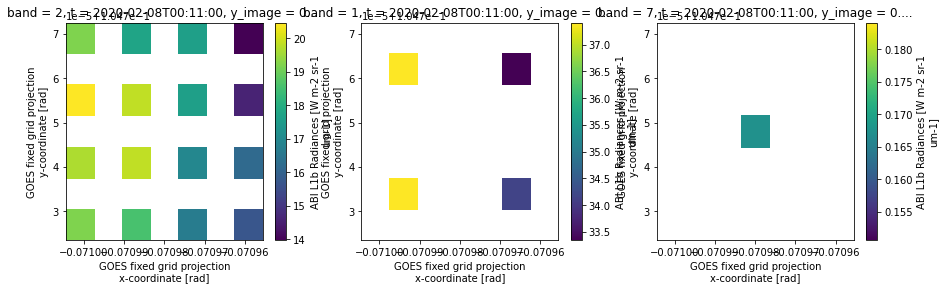

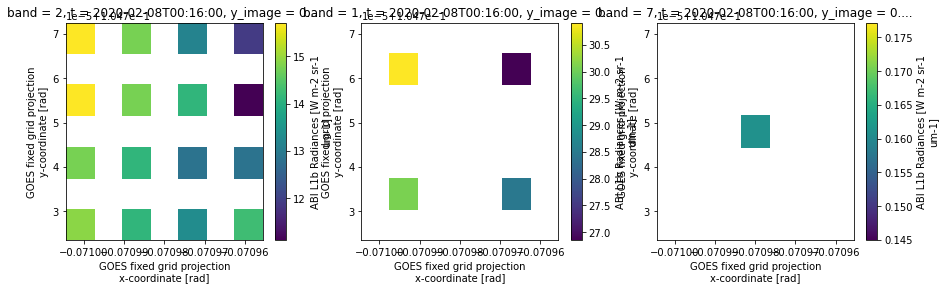

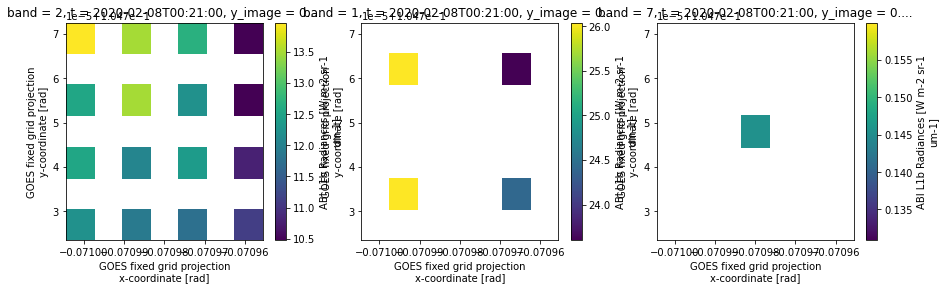

In [14]:
for i in range(5):
    fig,  [ax1, ax2, ax3] =plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    merged_ds.rad.sel(band=2).isel(t=i).plot(ax=ax1)
    merged_ds.rad.sel(band=1).isel(t=i).plot(ax=ax2)
    merged_ds.rad.sel(band=7).isel(t=i).plot(ax=ax3)

-------
Old version

In [164]:
#
#
#print('Creating a timeseries of {data_vars} from {product} at ({lat}, {lon}, {z})'.format(data_vars=data_vars,
#                                                                                             product=product,
#                                                                                             lat=lat,
#                                                                                             lon=lon,
#                                                                                             z=z))
#
#row_dicts = {}
#data_list = []
#print('Reading:')
#for filename in file_list:
#    try:
#        #print('{}'.format(filename), end='\r')
#
#        with xr.open_dataset(filename, decode_times=False) as f:
#            # I've included "decode_times=False" to this xr.open_dataset because I've encountered some ABI-L2-ACMC files where the timestamp couldn't be read
#            # and xarray gave a "ValueError: unable to decode time units 'seconds since 2000-01-01 12:00:00' with the default calendar. Try opening your dataset with decode_times=False."
#            # I've also switched which timestamp from the ABI files I'm reading (was f.time_bounds.values.min(), now f.time_coverage_start)
#                   
#            # get the timestamp for this observation (these should all be UTC, but I am removing timezone info because not all timestamps are converting the same way, and I was getting a "Cannot compare tz-naive and tz-aware timestamps" error)
#            timestamp = pd.Timestamp(f.time_coverage_start).replace(tzinfo=None)
#            if timestamp not in row_dicts.keys():
#                row_dicts[timestamp] = {}
#        
#            band = f.band_id.values[0]
#            band_formatted = '{:02.0f}'.format(band)
#            if band == 2:
#                #print(f.band_id.values[0])
#                # find corresponding pixel 'Rad' value nearest to these scan angles y_rad and x_rad
#                values = f['Rad'].sel(y=nearest_ys_500m[:,0], x=nearest_xs_500m[0,:], method='nearest').values.ravel()  #.rename({'x': 'x05','y': 'y05'})
#                row_dicts[timestamp][f'x{band_formatted}'] = nearest_xs_500m[0,:].ravel()
#                row_dicts[timestamp][f'y{band_formatted}'] = nearest_ys_500m[:,0].ravel()
#                # If we are looking at a reflective band (bands 1-6), convert Radiance to Reflectance
#                ref_or_tb = goes_ortho.goesReflectance(values, f.kappa0.values).ravel()
#            elif band in [1, 3, 5]:
#                #print(f.band_id.values[0])
#                # find corresponding pixel 'Rad' value nearest to these scan angles y_rad and x_rad
#                values = f['Rad'].sel(y=nearest_ys_1km[:,0], x=nearest_xs_1km[0,:], method='nearest').values.ravel() #.rename({'x': 'x1','y': 'y1'})
#                row_dicts[timestamp][f'x{band_formatted}'] = nearest_xs_1km[0,:].ravel()
#                row_dicts[timestamp][f'y{band_formatted}'] = nearest_ys_1km[:,0].ravel()
#                # If we are looking at a reflective band (bands 1-6), convert Radiance to Reflectance
#                ref_or_tb = goes_ortho.goesReflectance(values, f.kappa0.values).ravel()
#            else:
#                #print(f.band_id.values[0])
#                # find corresponding pixel 'Rad' value nearest to these scan angles y_rad and x_rad
#                values = f['Rad'].sel(y=nearest_ys_2km[:,0], x=nearest_xs_2km[0,:], method='nearest').values.ravel() #.rename({'x': 'x2','y': 'y2'})
#                row_dicts[timestamp][f'x{band_formatted}'] = nearest_xs_2km[0,:].ravel()
#                row_dicts[timestamp][f'y{band_formatted}'] = nearest_ys_2km[:,0].ravel()
#                # If we are looking at an emissive band (bands 7-16), convert Radiance to Brightness Temperature (K)
#                ref_or_tb = goes_ortho.goesBrightnessTemp(values, f.planck_fk1.values, f.planck_fk2.values, f.planck_bc1.values, f.planck_bc2.values).ravel()
#        
#
#                
#            #values = values.expand_dims(dim={"t": 1}) \
#            #               .expand_dims(dim={"band": 1}) \
#            #               .assign_coords(band=('band', [band])) \
#            #               .rename(f'rad')
#            #data_list.append(values)
#
#            # add our time stamp to this dict before we update the dataframe
#            row_dicts[timestamp]['time'] = timestamp       
#            # create a dictionary for this row of values (where each row is a GOES-R observation time)
#            row_dicts[timestamp][f'rad{band_formatted}'] = values
#            # add reflectance or brightness temperature to this row's update dict
#            if band <= 6:
#                row_dicts[timestamp][f'ref{band_formatted}'] = ref_or_tb
#                #ref_or_tb = ref_or_tb.expand_dims(dim={"t": 1}) \
#                #                     .expand_dims(dim={"band": 1}) \
#                #                     .assign_coords(band=('band', [band])) \
#                #                     .rename('ref')
#            else:
#                row_dicts[timestamp][f'tb{band_formatted}'] = ref_or_tb
#                #ref_or_tb = ref_or_tb.expand_dims(dim={"t": 1}) \
#                #                     .expand_dims(dim={"band": 1}) \
#                #                     .assign_coords(band=('band', [band])) \
#                #                     .rename('tb')
#                
#            #data_list.append(ref_or_tb)
#        
#            # Finally, append this_row_dict to our dataframe for this one GOES-R observation time
#            #df = df.append(this_row_dict, ignore_index=True)
#                        
#
#    except AttributeError as e:
#        print(e)
#        pass

In [145]:
# drop duplicates if there are any, keep the first one
#df.drop_duplicates(['time'], keep='first', inplace=True)

#df = pd.DataFrame.from_dict(row_dicts).transpose()
## set the dataframe intext to the timestamp column
#df.set_index('time', inplace = True, verify_integrity = True)

In [212]:
#outfilepath = 'testing.csv'
#
## if an output filepath was provided, save the dataframe as a csv
#if outfilepath is not None:
#    print('Saving csv file to: {}'.format(outfilepath))
#    df.to_csv(outfilepath)

---

Plotting

In [ ]:
directory = '/storage/GOES/goes16/2020/2/8/**/'
product = 'RadC'
data_vars = ['Rad']
lon = -108.192316
lat = 39.019474
z = 3047 # elevation in meters

df = make_abi_l1b_rad_timeseries(directory, product, data_vars, lon, lat, z, outfilepath=None)

In [ ]:
df.Rad.plot()

In [ ]:
!ls /storage/GOES/goes16/2020/2/8/ABI-L1b-RadC/19/C14

In [ ]:
ds = xr.open_dataset('/storage/GOES/goes16/2020/2/8/ABI-L1b-RadC/19/C02/OR_ABI-L1b-RadC-M6C02_G16_s20200391916052_e20200391918425_c20200391918472.nc')
ds_1km = xr.open_dataset('/storage/GOES/goes16/2020/2/8/ABI-L1b-RadC/19/C01/OR_ABI-L1b-RadC-M6C01_G16_s20200391926052_e20200391928425_c20200391928488.nc')
ds_2km = xr.open_dataset('/storage/GOES/goes16/2020/2/8/ABI-L1b-RadC/19/C14/OR_ABI-L1b-RadC-M6C14_G16_s20200391936052_e20200391938425_c20200391938553.nc')

In [ ]:
#ds = xr.open_dataset('/storage/GOES/goes16/2020/2/8/ABI-L1b-RadC/01/C02/OR_ABI-L1b-RadC-M6C02_G16_s20200390156061_e20200390158434_c20200390158475.nc')

In [ ]:
lon = -108.192316
lat = 39.019474
z = 3047 # elevation in meters

In [ ]:
x_rad, y_rad = goes_ortho.LonLat2ABIangle(lon,
                                           lat,
                                           z,
                                           ds.goes_imager_projection.perspective_point_height + ds.goes_imager_projection.semi_major_axis,
                                           ds.goes_imager_projection.semi_major_axis,
                                           ds.goes_imager_projection.semi_minor_axis,
                                           0.0818191910435, # GRS-80 eccentricity
                                           ds.goes_imager_projection.longitude_of_projection_origin)    
x_rad, y_rad

In [ ]:
nearest_xs_2km, nearest_ys_2km, nearest_xs_1km, nearest_ys_1km, nearest_xs_500m, nearest_ys_500m = goes_ortho.get_nested_coords(ds_2km, x_rad, y_rad)

In [ ]:
n = 4
dradians = 14e-6

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))



ds_2km.Rad.plot(cmap='Greys_r', ax=ax, add_colorbar=False)
ds.sel(y=nearest_ys_500m[:,0], x=nearest_xs_500m[0,:], method='nearest').Rad.plot(ax=ax, cmap='Blues_r', alpha=0.5, add_colorbar=False)
ds_1km.sel(y=nearest_ys_1km[:,0], x=nearest_xs_1km[0,:], method='nearest').Rad.plot(ax=ax, cmap='Reds_r', alpha=0.5, add_colorbar=False)

plt.plot(x_rad, y_rad, linestyle='none', marker='o', color='magenta', markersize=15)

plt.plot(nearest_xs_500m, nearest_ys_500m, linestyle='none', marker='+', color='red', markersize=15)

plt.plot(nearest_xs_1km, nearest_ys_1km, linestyle='none', marker='+', color='cyan', markersize=15)

plt.plot(nearest_xs_2km, nearest_ys_2km, linestyle='none', marker='+', color='yellow', markersize=15)

ax.set_xlim((x_rad - dradians*n, x_rad + dradians*n));
ax.set_ylim((y_rad - dradians*n, y_rad + dradians*n));

In [ ]:
a = xr.merge([ds_2km.sel(y=nearest_ys_2km[:,0], x=nearest_xs_2km[0,:], method='nearest').Rad.rename('Rad07'), 
              ds.sel(y=nearest_ys_500m[:,0], x=nearest_xs_500m[0,:], method='nearest').Rad.rename('Rad02'), 
              ds_1km.sel(y=nearest_ys_1km[:,0], x=nearest_xs_1km[0,:], method='nearest').Rad.rename('Rad01')], compat="override")

a


In [ ]:
a.Rad02.plot()

In [ ]:
a.Rad01.plot()

In [ ]:
a.Rad07.plot()